<a href="https://www.kaggle.com/code/mahyarmoazezi/ols-regression?scriptVersionId=130641269" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-house-price/realest.csv


**Linear Regression By Multiple Ways**

**OLS Method**

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading Data**

In [3]:
df = pd.read_csv("/kaggle/input/chicago-house-price/realest.csv")
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [4]:
df.describe()
df["Space"].fillna(0,inplace=True)
df["Price"].fillna(0,inplace=True)

**Ordinary Least Squared**

Define inputs and outputs (X_train and y_train)

In [5]:
X = df["Space"]
y = df["Price"]

Find w and b of the cost function

In [6]:
def wb_finder(a,b):
    a_bar = np.mean(a)
    b_bar = np.mean(b)
    m = len(a)
    w_sum_nu = 0
    w_sum_de = 0
    for i in range(m):
        w_sum_nu += (a[i] - a_bar) * (b[i] - b_bar)
        w_sum_de +=  (a[i] - a_bar) ** 2
    w= w_sum_nu / w_sum_de
    b = b_bar - (w * a_bar)
    return w,b

w,b = wb_finder(X,y)

find prediction for each input

In [7]:
def predict(inp):
    m = len(inp)
    f_wb = []
    for i in range(m):
        f_wb.append((w * inp[i]) + b) 
    return f_wb

y_train = predict(X)

Plot our model

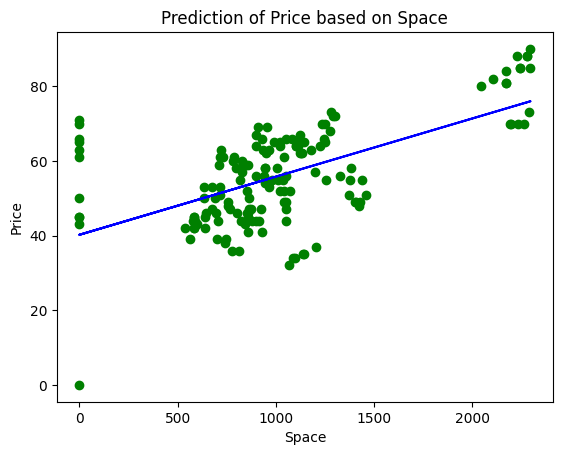

In [8]:
plt.scatter(X,y,c="g")
plt.plot(X,y_train,c="b")
plt.title("Prediction of Price based on Space")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()
